# Assignment 01 – Generative and Non-Generative Methods

#### Group 2 - Eric Lim - ml1859
#### Group 2 - Klass van Kempen - kjv13
#### Group 2 - Jude Moukarzel - jjm385

# Initialization 

## Load the dataset. (0.5 x 2)

In [1]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename = 'datasets/online_shoppers_intention.csv'
urllib.request.urlretrieve(url, filename)

('datasets/online_shoppers_intention.csv',
 <http.client.HTTPMessage at 0x1c4ea91c760>)

## Show first 6 data points using head(). (0.5 x 2)

In [2]:
import pandas as pd
filename = 'datasets/online_shoppers_intention.csv'
OSI = pd.read_csv(filename, header=0)
OSI["Weekend"] = OSI["Weekend"].astype(int)
OSI["Revenue"] = OSI["Revenue"].astype(int)
OSI.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI['VisitorType'])[0] + 1)
OSI = OSI.drop('VisitorType', axis=1)

OSI.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [3]:
OSI.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


In [4]:
new_col_names = {
    'Administrative_Duration' : 'AdministrativeDuration',
    'Informational_Duration' : 'InformationalDuration',
    'ProductRelated_Duration' : 'ProductRelatedDuration'
}

OSI.rename(columns=new_col_names, inplace=True)

## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

In [5]:
month_numeric_encoding = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

OSI["Month"] = OSI["Month"].map(month_numeric_encoding)

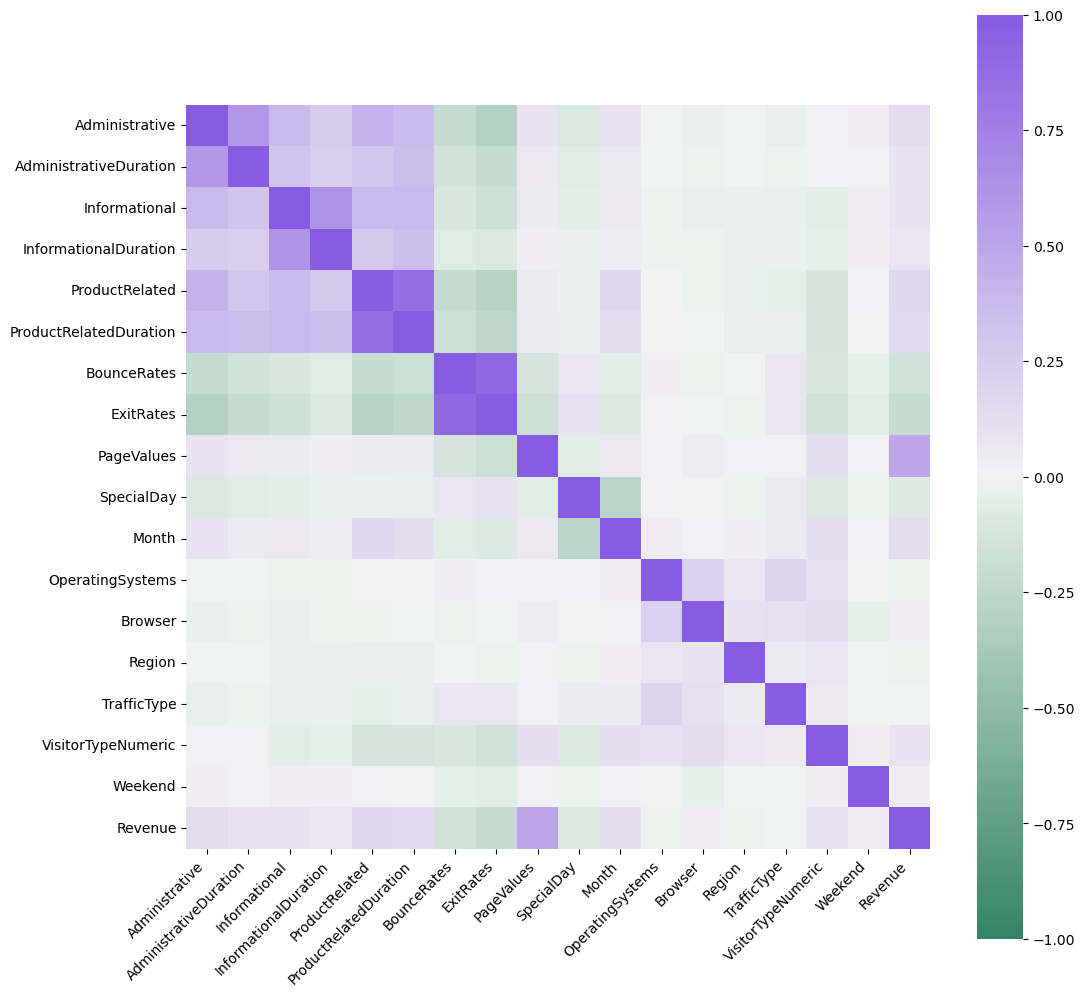

In [6]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = OSI.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


<Figure size 1800x1800 with 0 Axes>

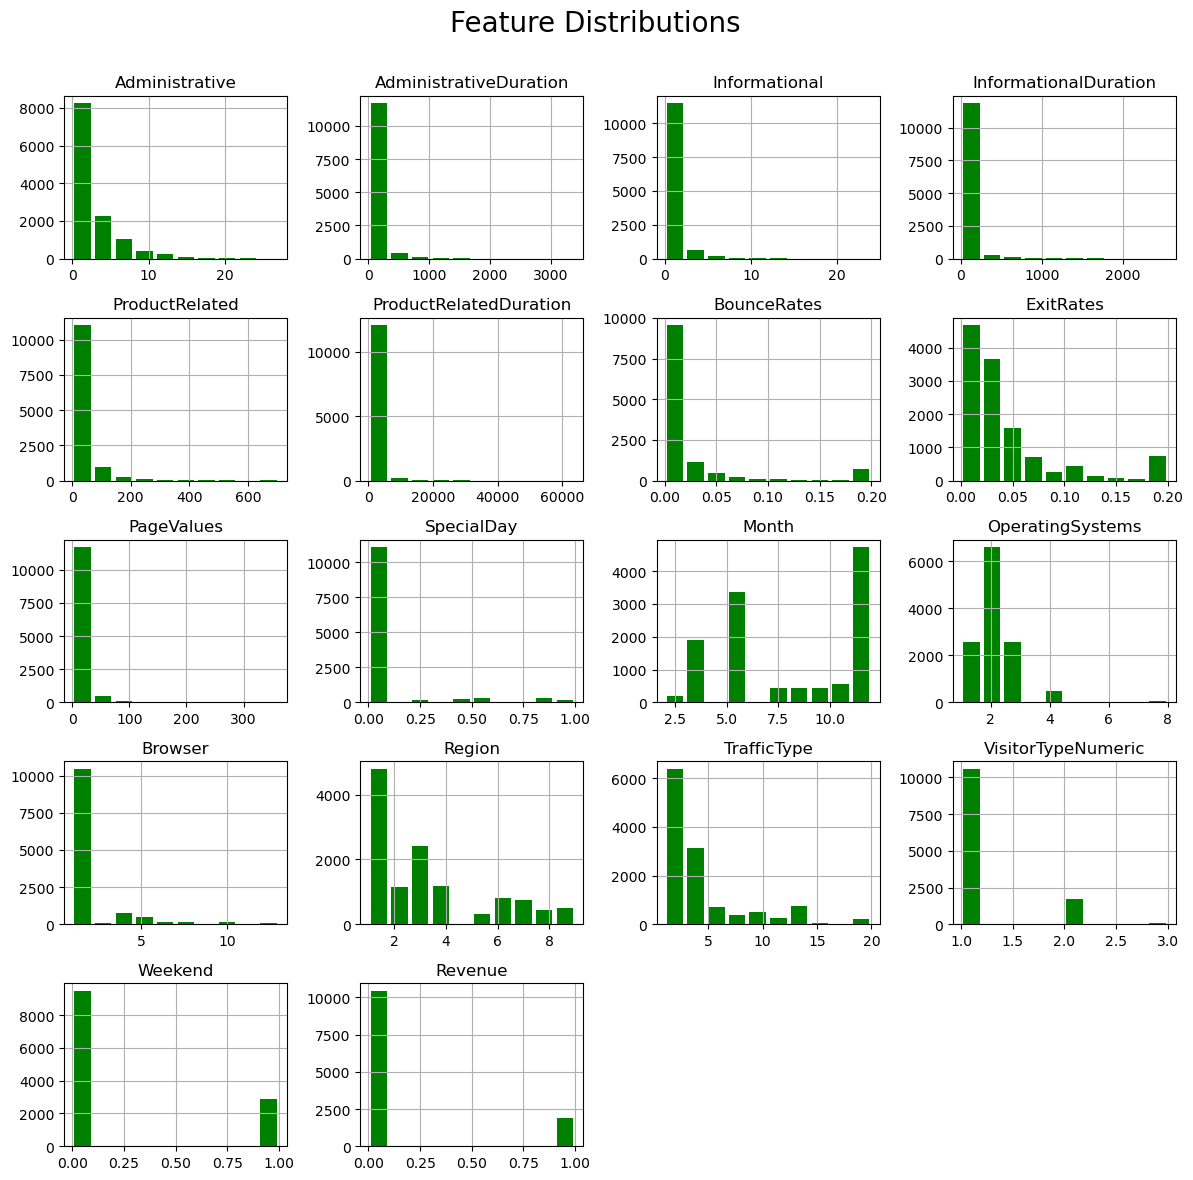

In [42]:
import matplotlib.pyplot as plt

OSI[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorTypeNumeric', 'Weekend', 'Revenue']].astype(object)

plt.figure(figsize=(12, 12),dpi=150)
OSI.hist(color='green', rwidth=0.8)
plt.suptitle("Feature Distributions\n", size=20)
plt.tight_layout()
plt.grid(visible=False)

### Code Snippets used in Interpretation

In [45]:
month_vc = OSI['Month'].value_counts()
month_perc = (month_vc / len(OSI)) * 100
print(month_perc)

Month
5.0     27.283049
11.0    24.314680
3.0     15.466342
12.0    14.006488
10.0     4.452555
9.0      3.633414
8.0      3.511760
7.0      3.503650
2.0      1.492295
Name: count, dtype: float64


In [46]:
os_vc = OSI['OperatingSystems'].value_counts()
os_perc = (os_vc / len(OSI)) * 100
print(os_perc)

OperatingSystems
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: count, dtype: float64


In [47]:
browser_vc = OSI['Browser'].value_counts()
browser_perc = (browser_vc / len(OSI)) * 100
print(browser_perc)

Browser
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: count, dtype: float64


In [48]:
reg_vc = OSI['Region'].value_counts()
reg_perc = (reg_vc / len(OSI)) * 100
print(reg_perc)

Region
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: count, dtype: float64


In [49]:
tt_vc = OSI['TrafficType'].value_counts()
tt_perc = (tt_vc / len(OSI)) * 100
print(tt_perc)

TrafficType
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678
11     2.003244
20     1.605839
9      0.340633
7      0.324412
15     0.308191
19     0.137875
14     0.105434
18     0.081103
16     0.024331
12     0.008110
17     0.008110
Name: count, dtype: float64


In [50]:
vtn_vc = OSI['VisitorTypeNumeric'].value_counts()
vtn_perc = (vtn_vc / len(OSI)) * 100
print(vtn_perc)

VisitorTypeNumeric
1    85.571776
2    13.738848
3     0.689376
Name: count, dtype: float64


In [51]:
weekend_vc = OSI['Weekend'].value_counts()
weekend_perc = (weekend_vc / len(OSI)) * 100
print(weekend_perc)

Weekend
0    76.739659
1    23.260341
Name: count, dtype: float64


In [52]:
rev_vc = OSI['Revenue'].value_counts()
rev_perc = (rev_vc / len(OSI)) * 100
print(rev_perc)

Revenue
0    84.525547
1    15.474453
Name: count, dtype: float64


**NOTE:** referenced [Kaggle](https://www.kaggle.com/datasets/henrysue/online-shoppers-intention) for details on variables. Also, I couldn't find documentation on what some of the categorical variables' encodings, so the description is fairly limited.

The figure above shows the distributions for each feature variable in the Online Shoppers Purchasing Intention dataset. 

**Continuous Features**

Features that represent the number of different types of pages visited by a user (i.e. Administrative, Informational, and ProductRelated) are right-skewed, suggesting that the median and IQR may be more accurate measures of central tendencies for user behavior. These features, respectively, have medians of 1, 0, and 0 and IQRs of 4, 0, 31.

Features that represent the amount of time spent on the aforementioned three pages (i.e. AdministrativeDuration, InformationalDuration, and ProductRelatedDuration) are right-skewed. These features, respectively, have medians of 7.5, 0, and 598.94 and IQRs of 93.26, 0, and 1280.02.

Features that are metrics of "Google Analytics" (i.e. BounceRates, ExitRates, and PageValues) are right skewed. These features, respectively, have medians of 0.003, 0.025, and 0 and IQRs of 0.017, 0.036, and 0.

The SpecialDay feature represents the closeness of browsing date to some special day or holiday, and, unsurprisingly, the feature is right-skewed. SpecialDay has a median of 0 and an IQR of 1.

**Categorical Features**

The most frequent months for users partaking in online shopping sessions are May (27%), November (24%), March (15%), and December (14%). May is a bit strange, since the only public holiday in May is Memorial Day, which isn't necessarily a holiday associated with shopping when compared to holidays in November, March, and December, such as Thanksgiving, Mother's day, and Christmas.

The most frequent OS for users partaking in online shopping sessions is encoded 2 (54%), followed by encodings 1 and 3 (both 21%).

The most frequent Browser for users partaking in online shopping sessions is encoded 2 (65%), followed by encodings 1 (20%).

The most frequent Region for users partaking in online shopping sessions is encoded 1 (39%), followed by encodings 3 (20%).

The most frequent TrafficType for users partaking in online shopping sessions is encoded 2 (32%), followed by encodings 1 (20%) and 3 (17%).

Among the users partaking in online shopping sessions, about 86% are returning users and 14% are new visitors.

The online shopping sessions mostly occur on weekdays (77%), and most sessions (85%) do not occur in a completed purchase.

## Load the dataset. (0.5 x 2)

In [8]:
import pandas as pd
filename = 'datasets/Bike-Sharing-Hour.csv'
BSH = pd.read_csv(filename, header=0)

## Show first 6 data points using head(). (0.5 x 2)

In [9]:
import pandas as pd
BSH.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [10]:
BSH.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

In [11]:
BSH.drop(columns=['dteday'], inplace=True)

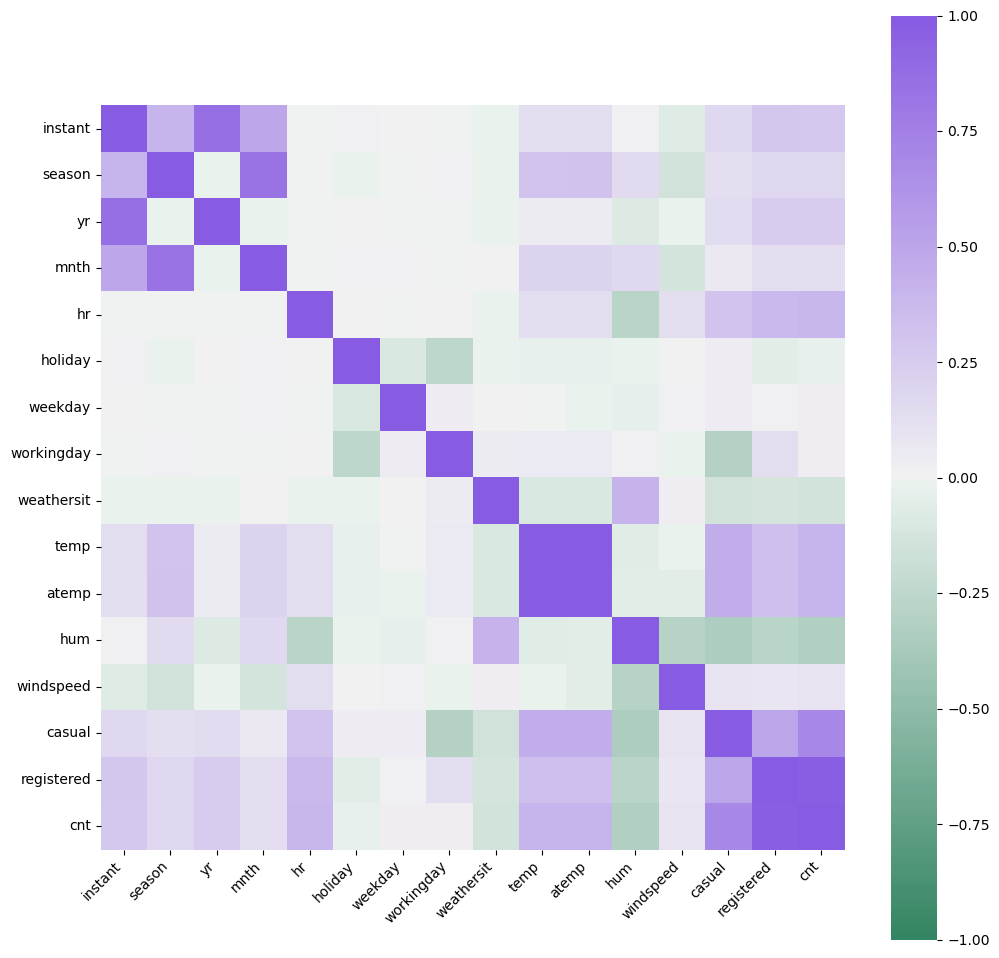

In [12]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = BSH.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 275, s=80, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


<Figure size 1800x1800 with 0 Axes>

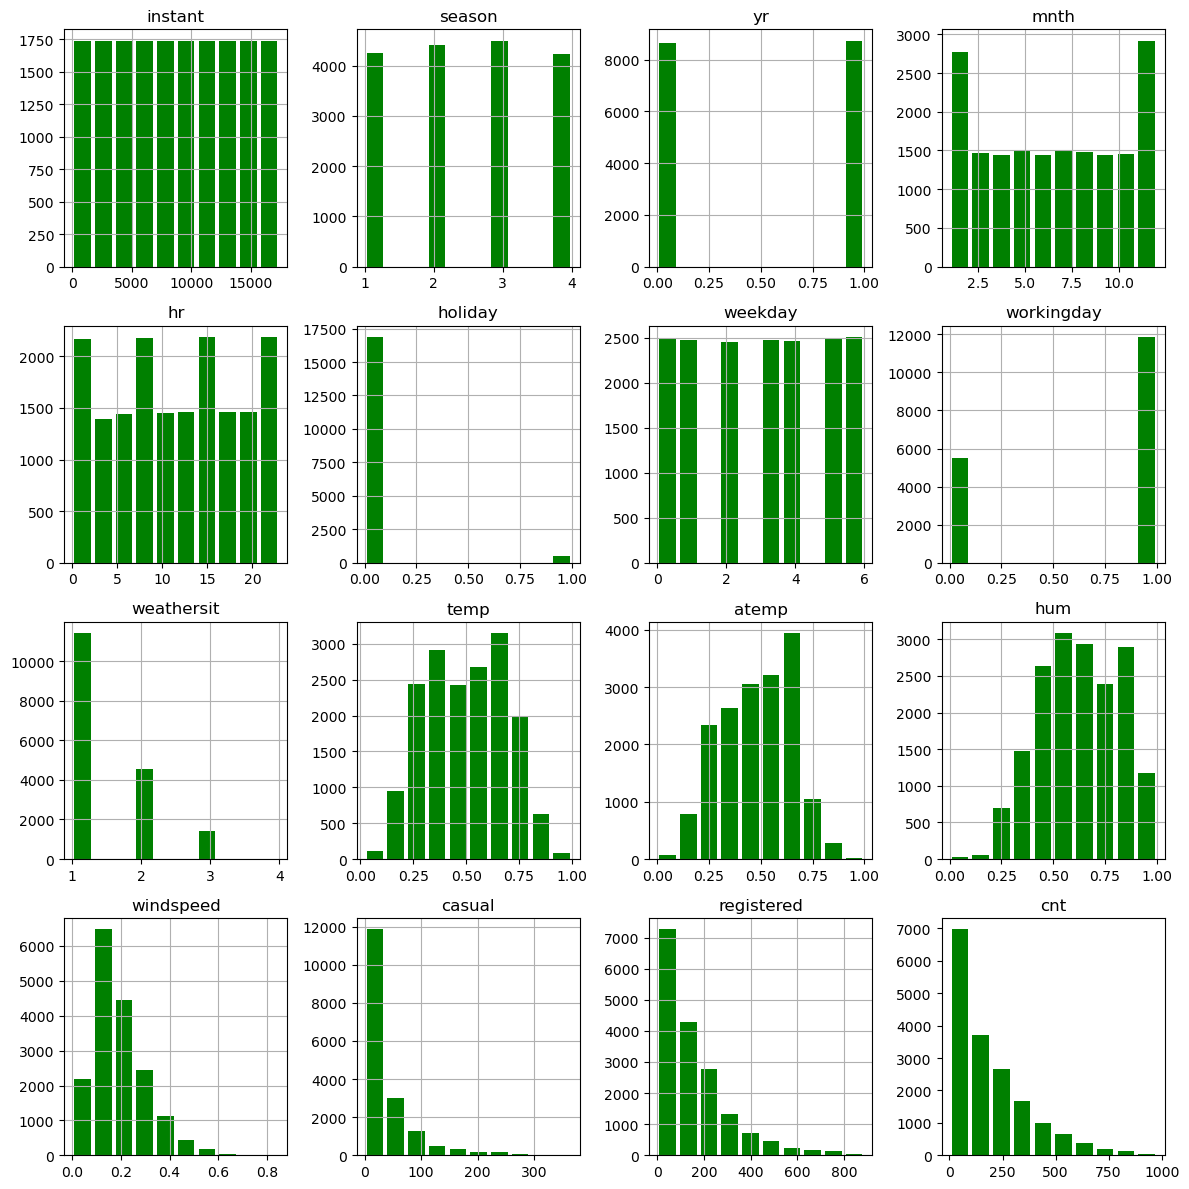

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
BSH.hist(color='green', rwidth=0.8)
plt.tight_layout()
plt.grid(visible=False)

enter interpretation here

# Intermediate Steps (Essential, no points granted)

In [14]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_OSI = OSI.loc[:, OSI.columns != 'Revenue'].to_numpy()
y_OSI = OSI.iloc[:,-1:].to_numpy()

# print(X_OSI)
# print(Y_OSI)


OSIX_train, OSIX_test, OSIy_train, OSIy_test = train_test_split(X_OSI, y_OSI, test_size=0.30, random_state=1859)

In [15]:
X_BSH = BSH.loc[:, BSH.columns != 'cnt'].to_numpy()
y_BSH = BSH.iloc[:,-1:].to_numpy()

# print(X_BSH)
# print(Y_BSH)

BSHX_train, BSHX_test, BSHy_train, BSHy_test = train_test_split(X_BSH, y_BSH, test_size=0.30, random_state=1859)

# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [16]:
from sklearn.ensemble import AdaBoostClassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

In [17]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)


### Train classifier on train data and explain what you did. (1.5) 

In [18]:
ada_fit = clf.fit(OSIX_train, OSIy_train)

ValueError: Input X contains NaN.
AdaBoostClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Test/fit classifier test data and explain what you did. (1.5)

In [ ]:
OSIy_pred = ada_fit.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

In [ ]:

print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3077
           1       0.67      0.54      0.60       622

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


<Figure size 187.5x187.5 with 0 Axes>

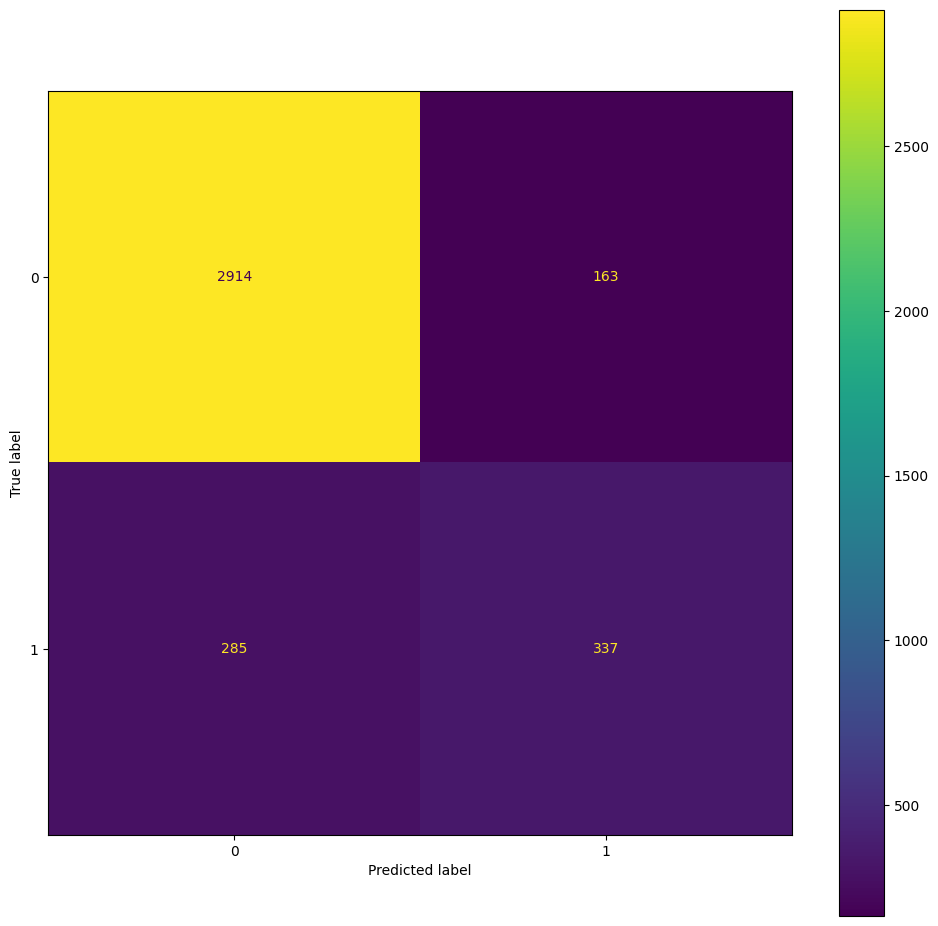

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix = confusion_matrix(OSIy_test, OSIy_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, OSIX_test, OSIy_test)

### Repeat the same with a different parameter set and compare the result with (2)


## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 